# Lecture 23

# Beta distribution, Bayes' Billiards

## Beta Distribution

The Beta distribution is characterized as $Beta(\alpha, \beta)$ where $\alpha \gt 0 \text{, } \beta \gt 0$.

The Beta distribution PDF is given by:

\begin{align}
  f(x) &= c \, x^{\alpha-1} \, (1 - x)^{\beta-1} \quad \text{where } 0 \lt x \lt 1 
\end{align}

We will put aside the normalization constant $c$ for now (wait until lecture 25!).

$Beta(\alpha ,\beta)$ distribution

* is a flexible family of continuous distributions over $(0,1)$ (see graph below for some examples)
* often used as a _prior_ for a parameter in range $(0,1)$
* _conjugate prior_ for $Binomial$ distribution

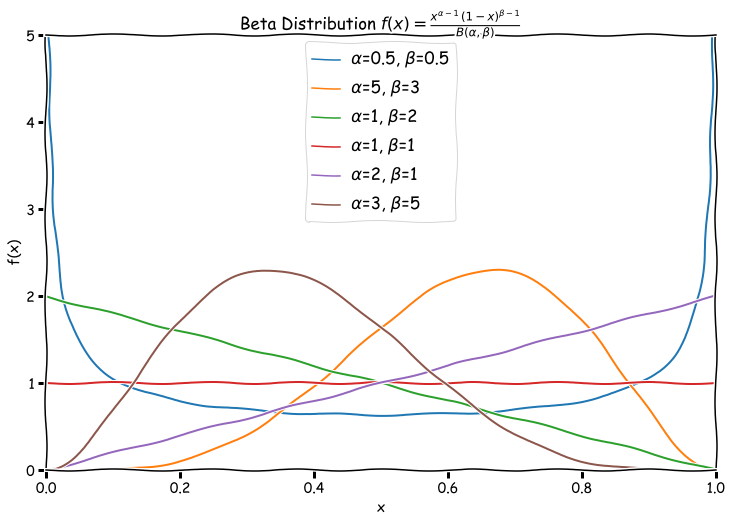

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
%matplotlib inline  

plt.xkcd()

x = np.linspace(0, 1.0, 500)

alphas = [0.5, 5, 1, 1, 2, 3]
betas  = [0.5, 3, 2, 1, 1, 5]
params = map(list, zip(alphas, betas))

_, ax = plt.subplots(figsize=(12,8))

for a,b in params:
    y = beta.pdf(x, a, b)
    ax.plot(x, y, label=r'$\alpha$={}, $\beta$={}'.format(a,b))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

plt.title(r'Beta Distribution $f(x) = \frac{x^{\alpha-1} \, (1-x)^{\beta-1}}{B(\alpha,\beta)}$')
plt.xlabel(r'x')
plt.ylabel(r'f(x)')
plt.xlim((0,1.0))
plt.ylim((0,5.0))
    
plt.show()

### Conjugate prior to the Binomial

Recall Laplace's Rule of Sucession dealing with the problem of the sun rising: there, we probability $p$ that the sun will rise on any given day $X_k$, given a consecutive string of days $X_1,X_2, \dots, X_{k-1}$, to be i.i.d. $Bern(p)$. 

We made an assumption that $p \sim Unif(0,1)$.

$Beta(1,1)$ is the same as $Unif(0,1)$, and so we will show how to generalize using the $Beta$ distribution.

Given $X|p \sim Bin(n,p)$. We get to observe $X$, but we do not know the true value of $p$. 

In such a case, we can assume that the _prior_ $p \sim Beta(\alpha, \beta)$. After observing $n$ further trials, where perhaps $k$ are successes and $n-k$ are failures, we can use this information to update our beliefs on the nature of $p$ using Bayes Theorem.

So we what we want is the _posterior_ $p|X$, since we will get to observe more values of $X$ and want to update our understanding of $p$.

\begin{align}
  f(p|X=k) &= \frac{P(X=k|p) \, f(p)}{P(X=k)} \\
  &= \frac{\binom{n}{k} \, p^k \, (1-p)^{n-k} \, c \, p^{\alpha-1}(1-p)^{\beta-1}}{P(X=k)} \\
  &\propto p^{\alpha + k - 1} (1-p)^{\beta + n - k - 1} \quad \text{since }\binom{n}{k} \text{, }c \text{ and }P(X=k) \text{ do not depend on }p \\
  \\
  \Rightarrow p|X &\sim Beta(\alpha + X, \beta + n - X) 
\end{align}

_Conjugate_ refers to the fact that we are looking at an entire _family_ of $Beta$ distributions as the _prior_. We started off with $Beta(\alpha, \beta)$, and after an additional $n$ more observations of $X$ we end up with $Beta(\alpha + X, \beta + n - X)$.

### Bayes' Billiards

The $Beta(\alpha, \beta)$ distribution has PDF:

\begin{align}
  f(x) &= c \, x^{\alpha-1} \, (1 - x)^{\beta-1}
\end{align}

Let's try to find the normalizing constant $c$ for the case where $\alpha \gt 0 \text{, } \beta \gt 0$, and $\alpha,\beta \in \mathbb{Z}$

In order to do that, we need to find out 

\begin{align}
  \int_0^1 x^k \, (1 - x)^{n-k} \, dx \\
  \\
  \rightarrow \int_0^1 \binom{n}{k} x^k \, (1 - x)^{n-k} \, dx
\end{align}

#### Story 1
We have $n+1$ white billiard balls, and we paint one of them pink. Now we throw them down on the number line from 0 to 1.

#### Story 2
We throw our $n+1$ white billiard balls down on the number line from 0 to 1, and _then_ randomly select one of them to paint in pink. 

![title](images/L2301.png)

_Note that the image above could have resulted from either of the stories, so both stories are actually equivalent._

#### Doing calculus without using calculus

At this point, we know exactly how to the above integral _without using any calculus._

Let $X = \text{# balls to left of pink}$, so $X$ ranges from $0$ to $n$. If we condition on $p$ (pink billiard ball), we can consider this to be a binomial distribution problem, where "success" means being to the left of the pink ball.

\begin{align}
  P(X = k) &= \int_0^1 P(X=k|p) \, f(p) \, dp &\quad \text{conditioning on } p \\
  &= \int_0^1 \binom{n}{k} p^k \, (1-p)^{n-k} \, dp &\quad \text{since } f(p) \sim Unif(0,1) \\
  \\
  & &\quad \text{but from Story 2, } k \text{ could be any value in } \{0,n\} \\
  \\
  &= \boxed{ \frac{1}{n+1} }
\end{align}

And so now we have the normalizing constant when $\alpha, \beta$ are positive integers.